**face land mark(랜드마크), alignment(조정)**  
얼굴의 각각 특정 위치를 알아내고 스티커를 붙이자


In [2]:
#구글드라이브 mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 이미지에 왕관 스티커 붙이기

### 1) 이미지 데이터 준비

In [ ]:
#경로이동, 이미지 저장
%cd drive/MyDrive/Colab Notebooks/Data-Science/data/img
!pwd

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/Data-Science/data/img'
/content/drive/My Drive/Colab Notebooks/Data-Science/data/img
/content/drive/My Drive/Colab Notebooks/Data-Science/data/img


In [ ]:
# 왕관 이미지 저장
!wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/king.png
!wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/hero.png

--2021-07-20 01:42:51--  https://aiffelstaticprd.blob.core.windows.net/media/original_images/king.png
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13511 (13K) [image/png]
Saving to: ‘king.png.1’

king.png.1          100%[===================>]  13.19K  --.-KB/s    in 0.001s  

2021-07-20 01:42:52 (16.3 MB/s) - ‘king.png.1’ saved [13511/13511]

--2021-07-20 01:42:52--  https://aiffelstaticprd.blob.core.windows.net/media/original_images/hero.png
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42963 (42K) [image/png]
Saving t

In [ ]:
# opencv, cmake, dlib 설치
!pip install opencv-python
!pip install cmake
!pip install dlib

### 2) 얼굴 검출 face detection

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


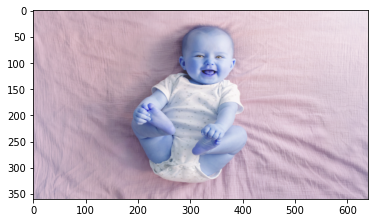

In [ ]:
import os
#my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
my_image_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/data/img/baby_face.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize (16:9)
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

640x360의 VGA 크기(16:9)로 고정 (4:3일 경우 640*480으로 변경)  

`cv2.imread('img.png', flag)`  
- flag: 1(original), 0(Grayscale), -1  

`cv2.iIMREAD_COLOR` : 이미지 파일을 Color로 읽어들임. 투명한 부분은 무시되며, Default값

`cv2.IMREAD_GRAYSCALE` : 이미지를 Grayscale로 읽어 들임. 실제 이미지 처리시 중간단계로 많이 사용.

`cv2.IMREAD_UNCHANGED` : 이미지파일을 alpha channel까지 포함하여 읽어 들임


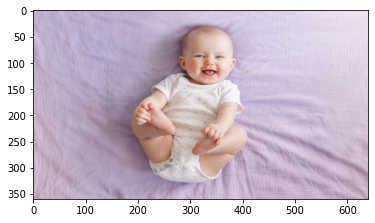

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
# opencv는 BGR을 사용하므로 RGB로 보정처리
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# Object detection 기술을 활용해 얼굴 위치 찾기
# dlib face detector
import dlib
#- detector 선언
detector_hog = dlib.get_frontal_face_detector()  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#bounding box 추출
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

**`dlib`의 `face detector`** : `HOG`(`Histogram of Oriented Gradient`) feature를 사용해 `SVM`(`Support Vector Machine`)의 sliding window로 얼굴을 찾는다.  
* [`딥러닝(Deep Learning)을 사용한 최신 얼굴 인식(Face Recognition) (한국어 번역본)`](https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c)  

`gradient`를 `feature`로 사용하는 이유
- 픽셀의 `RGB`값 자체보다는 인접한 픽셀들 사이의 색상 변화율 자체에 오브젝트의 특징이 더욱 정확히 반영될 때가 많기 때문
- 동일한 오브젝트라도 밝을 때와 어두울 때의 픽셀값의 분포는 완전히 다르지만, 밝기가 변하는 (`gradient`)만 고려하면 주변 상황과 무관하게 동일한 표현(representation)을 얻을 수 있음  

[Image Pyramids](https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html) : 작게 촬영된 이미지를 크게 볼 수 있어 정확한 검출 가능

rectangles[[(295, 56) (384, 146)]]


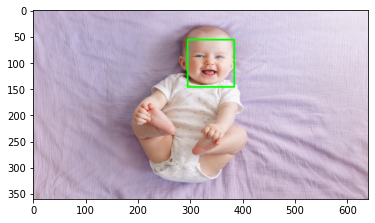

In [ ]:
# 찾은 얼굴 화면에 출력하기
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

>[Classes - dlib documentation](http://dlib.net/python/index.html#dlib.rectangles)

### 3) 얼굴 랜드마크 추론 face landmark localization
 `face landmark`는 detection 결과물인 `bounding box`로 crop 한 이미지 이용

 `Object keypoint estimation` 알고리즘 : 객체 내부의 점을 찾는 기술  
① `top-down` : `bounding box`를 찾고 **box 내부**의 `keypoint`를 예측  
② `bottom-up` : **이미지 전체**의 `keypoint`를 찾고 `point`관계를 군집화 해 `box` 생성  

**① + [ibug 300w](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/) 데이터셋을 활용해보자 ! (Dlib)**  
(*참고논문 : [One Millisecond Face Alignment with an Ensemble of Regression Trees](https://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Kazemi_One_Millisecond_Face_2014_CVPR_paper.pdf)*)


![image](https://user-images.githubusercontent.com/45934191/126257061-0c634ea6-4282-44d3-934a-6a436666587f.png)

#### model 폴더에 dlib landmark localization 설치

In [ ]:
!pwd
%cd ../../model/

/content/drive/My Drive/Colab Notebooks/Data-Science/data/img
/content/drive/My Drive/Colab Notebooks/Data-Science/model


In [ ]:
#설치
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-07-20 02:21:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  25.2MB/s    in 2.4s    

2021-07-20 02:21:17 (25.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
#압축풀기
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

#### 이미지에 face landmark 출력

68


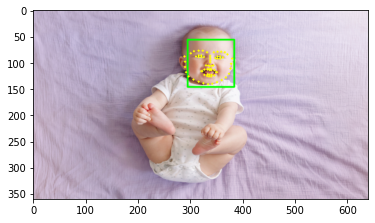

In [ ]:
import os
#model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
model_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/model/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path) #landmark 모델 불러오기

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) #landmark_predictor : rgb이미지, dlib.rectangle 입력받아 dlib.full_object_detection return
    
    #points는 dlib.full_object_detection의 객체이므로 parts()함수로 개별 위치에 접근 가능
    #(x,y) 형태로 접근할 수 있도록 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # lisg_points : 68개 랜드마크

# 랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


### 4) 스티커 적용
랜드마크를 기준으로 '눈썹 위 얼굴 중앙' 에 스티커를 씌우기  
① 코 중심을 기준으로 높이 x 이상에 그리거나  
② 눈썹 위 n 픽셀 위에 스티커를 구현

얼굴 위치, 카메라의 거리에 따라 픽셀 x 가 다르기 때문에 비율로 계산해야 함
- 스티커 위치  
$$ 
x = x_{nose} \\  
y = y_{nose}-\frac{height}{2}
$$

- 스티커 크기  
$$ 
width = height = width_{bbox}
$$


In [ ]:
# 코 중심점 좌표 확인하기 
print(list_landmarks)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #이미지에 face가 다수일 수 있으므로 for loop로 코 중심점 찾기
    print (landmark[30]) # nose center index : 30. (x_nose, y_nose)
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 #코 중심을 기준으로 절반
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

[[(289, 88), (290, 98), (290, 108), (292, 118), (297, 126), (306, 132), (316, 136), (325, 139), (334, 141), (342, 140), (351, 137), (360, 133), (368, 128), (374, 121), (377, 111), (378, 102), (380, 92), (301, 82), (307, 78), (316, 77), (324, 77), (332, 80), (345, 80), (352, 79), (359, 79), (366, 80), (371, 84), (338, 87), (338, 91), (338, 95), (338, 99), (330, 105), (334, 105), (337, 106), (341, 106), (344, 105), (311, 88), (316, 86), (321, 86), (326, 89), (321, 89), (316, 89), (348, 91), (352, 88), (357, 88), (362, 90), (357, 92), (352, 92), (321, 116), (327, 113), (333, 112), (337, 112), (340, 112), (346, 114), (351, 118), (346, 124), (340, 126), (336, 126), (332, 125), (327, 123), (323, 116), (333, 113), (337, 114), (340, 114), (349, 118), (341, 123), (337, 123), (333, 122)]]
(338, 99)
(x,y) : (338,54)
(w,h) : (90,90)


(90, 90, 3)


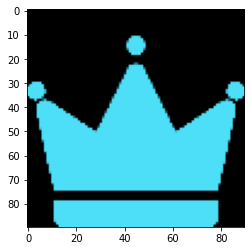

In [ ]:
sticker_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/data/img/king.png'
img_sticker = cv2.imread(sticker_path)        #스티커 이미지 읽기
img_sticker = cv2.resize(img_sticker, (w,h))  #w,h로 resize
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [ ]:
# 스티커 x, y좌표 조정
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (293,-36)


>**음수** : 원본 이미지의 범위를 벗어남  
=> `opencv` 데이터는 numpy `ndarray` 형태의 데이터를 사용하므로 out of index 에러 예외처리 필요

(54, 90, 3)


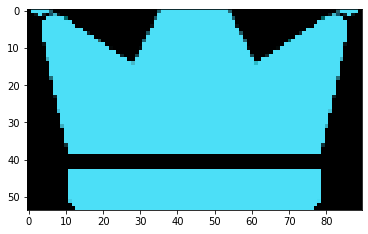

(x,y) : (293,0)


In [ ]:
# 원본 이미지의 범위 벗어난 스티커 부분 제거
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

# y좌표(top) 는 원본 이미지의 경계 값으로 수정
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

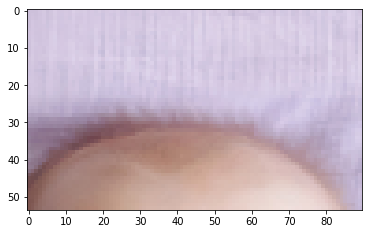

In [ ]:
# 원본 이미지에 스티커 적용

# 원본 이미지에서 스티커 적용할 위치 crop (293,0) ~ (293+90,0+54)
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#plt.imshow(sticker_area)
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.show()

# 스티커 이미지에서 0 아닌 색이 있는 부분만 사용
# img_sticker가 0일때 sticker_area 사용하고 나머지는 img_sticker
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

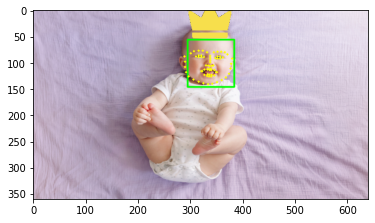

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

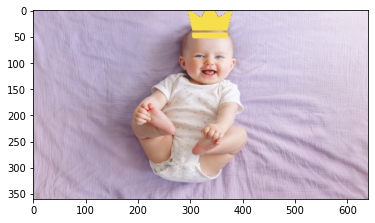

In [ ]:
# bounding box와 landmark 제거
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 고양이 수염 스티커 만들기

### 1) 이미지 데이터 준비

In [ ]:
!pwd

/content


### 2) 얼굴 검출

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

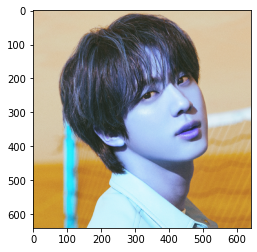

In [6]:
my_image_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/data/img/jin_rot.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x640의 크기로 Resize (2:3)
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

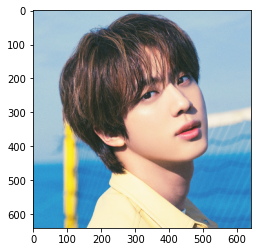

In [7]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
# opencv는 BGR을 사용하므로 RGB로 보정처리
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [8]:
# Object detection 기술을 활용해 얼굴 위치 찾기 - dlib face detector
import dlib
#- detector 선언
detector_hog = dlib.get_frontal_face_detector()  

#bounding box 추출
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(290, 142) (557, 409)]]


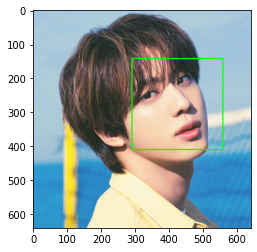

In [9]:
# 찾은 얼굴 화면에 출력하기
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3) 얼굴 랜드마크 추론

68


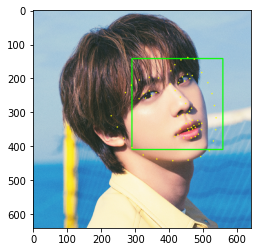

In [10]:
model_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/model/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path) #landmark 모델 불러오기

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) #landmark_predictor : rgb이미지, dlib.rectangle 입력받아 dlib.full_object_detection return
    
    #points는 dlib.full_object_detection의 객체이므로 parts()함수로 개별 위치에 접근 가능
    #(x,y) 형태로 접근할 수 있도록 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # lisg_points : 68개 랜드마크

# 랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


### 4) 스티커 적용
랜드마크를 기준으로 '볼' 에 스티커를 씌우기  
① 코를 중심으로 스티커를 맞추고 
② 눈 또는 볼의 각도로 스티커 회전


- 스티커 위치  
$$ 
x = height_{nose} \\  
y= width_{nose}
$$
- 스티커 크기  
$$ 
width = height = width_{box}
$$

- 스티커 각도  
$$ 
theta = θ
$$
  
<img src="https://user-images.githubusercontent.com/45934191/126292478-9d385e46-2813-48f4-a0d5-3489ca6c8d16.png" width="500" height="500">


![image](https://user-images.githubusercontent.com/45934191/126257061-0c634ea6-4282-44d3-934a-6a436666587f.png)  
**hint : 2, 36, 48, 30 번 인덱스를 이용** (턱, 눈, 입, 코)

In [13]:
# top, left 좌표 확인하기 
#print(list_landmarks)
import math

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): #이미지에 face가 다수일 수 있으므로 for loop로 코 중심점 찾기
    print (landmark[36], landmark[2], landmark[45]) # nose center index : 30. (x_nose, y_nose)

    x = (landmark[30][0]+landmark[32][0]+landmark[34][0])//3 # 30, 32, 34
    y = (landmark[30][1]+landmark[32][1]+landmark[34][1])//3

    w = dlib_rect.width()
    h = dlib_rect.width()

    # 각도 구하기
    # 눈 각도 : (h36-h45)/(w45-w36)
    # 또는 볼 각도 : (h2-h14)/(w14-w2)
    
    # w45, h45 = landmark[45]
    # w36, h36 = landmark[36]
    w2, h2 = landmark[2]
    w14, h14 = landmark[14]
    theta = np.arctan((h2-h14)/(w14-w2))

    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    print ('theta : ', theta)


(311, 260) (266, 376) (467, 192)
(x,y) : (448,292)
(w,h) : (268,268)
theta :  0.4682700722254645


(268, 268, 3)


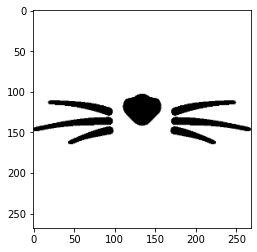

In [14]:
# 고양이 수염 스티커 가져오기
sticker_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/data/img/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)        #스티커 이미지 읽기
img_sticker = cv2.resize(img_sticker, (w,h))  #w,h로 resize
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB) # rgb로 변환(사진에 적용할 때 black 구분)
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [15]:
## 스티커 x, y좌표 조정
top = x - w//2
left = y - h//2
print(top, left)

314 158


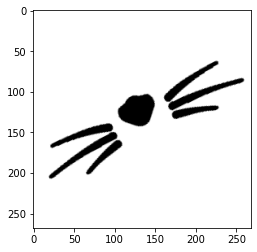

(268, 268, 3)

In [16]:
# 스티커 회전
# 이미지의 중심점을 기준으로 theta도 회전, 1배

#import PIL
#im_rotate = img_sticker_rgb.rotate(theta, fillcolor=(255, 128, 0), expand=True)

import math

# radian to degree
theta = theta*180/math.pi
M = cv2.getRotationMatrix2D((w/2,h/2),theta,1)
im_sticker_rotate = cv2.warpAffine(img_sticker_rgb, M, (w,h), borderValue=(255,255,255)) #rotation 후 빈 배경을 white로

plt.imshow(im_sticker_rotate)
plt.show()
im_sticker_rotate.shape

314 158
(268, 268, 3)


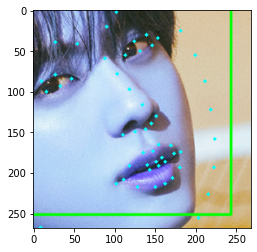

In [17]:
# 원본 이미지에 스티커 적용

# 원본 이미지에서 스티커 적용할 위치 crop (top,left) ~ (top+w,left+w)
print(top, left)
print(im_sticker_rotate.shape)
sticker_area = img_show[left:left+im_sticker_rotate.shape[1], top:top+im_sticker_rotate.shape[0]]
plt.imshow(sticker_area)
#plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.show()
#img_sticker_rgb.shape
#sticker_area.shape

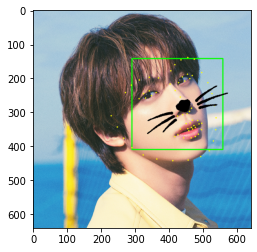

In [18]:
# 스티커 이미지에서 0 아닌 색이 있는 부분만 사용
# img_sticker가 0,0,0일때 im_rotate 사용하고 나머지는 sticker_area
img_show[left:left+im_sticker_rotate.shape[1], top:top+im_sticker_rotate.shape[0]] = \
    np.where(im_sticker_rotate==[0,0,0],im_sticker_rotate, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

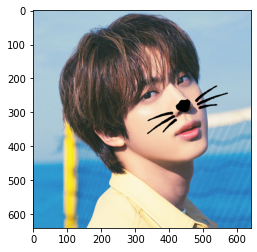

In [19]:
# bounding box와 landmark 제거
sticker_area = img_bgr[left:left+im_sticker_rotate.shape[1], top:top+im_sticker_rotate.shape[0]]
img_bgr[left:left+im_sticker_rotate.shape[1], top:top+im_sticker_rotate.shape[0]] = \
    np.where(im_sticker_rotate==[0,0,0],im_sticker_rotate, sticker_area).astype(np.uint8)
    
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

  
---
**To-Do**  
※ detector가 또렷한 정면 얼굴을 인식하지 못하는 경우는?  
 - dlib hog detector 동작 원리
 - 다른 detector 사용
 - 이미지의 문제인지 -> pyramid ??

※ face landmark  
- ② bottom-up,  다른 데이터셋으로 face landmark 출력해보기 (ex. [AFLW dataset](https://www.tugraz.at/institute/icg/research/team-bischof/lrs/downloads/aflw/))
 
※ 다수의 이미지 및 얼굴에 스티커가 적용되는것을 확인했지만 코드가 지저분함
- 함수, 가독성, 주석 수정

※ LaTeX 수식 줄바꿈 수정  
- colab과 jupyer notebook에서는 줄바꿈이 되어 있지만, github에서는 한줄로 출력됨

※ 스티커 자연스럽게!! (opacity)